<a href="https://colab.research.google.com/github/Arpitkamal/Deep-Learning--108--Convolutional-Neural-Network/blob/master/PyTorchCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outline


*   Downloading dataset (CIFAR10)
*   Dataloader in torch.utils
*   Visualising images
*   Single and mutliple convolutional layers
*   LeNet
*   Training LeNet
*   Training on GPU
*   Simplr visualisation
*   Exercises




In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Data loading

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
9


# Visualise data

In [6]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg, (1,2,0))
print(npimg.shape)

(32, 32, 3)


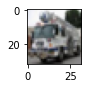

In [9]:
plt.figure(figsize= (1,1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

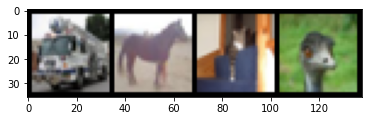

truck horse cat bird


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# Single Convolutional Layer

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3) #(no. of channel in each image(RGB), no of kernals, kernalsize)padding = (1,1), stride= (2,2)

  def forward(self, x):
    x = self.conv1(x)
    return x  

In [0]:
net = FirstCNN()

In [14]:
out = net(images)
out.shape

torch.Size([4, 16, 30, 30])

batch size= 4, output channel = 16 , x =30, y=30 initialy it was 32 

In [15]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


no of channel = 16, channel size(RGB)=3, kernalsize = 3*3

each kernal have 1 bias term

In [16]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(30, 30)


feature representation of 0th batch, 0th kernal 

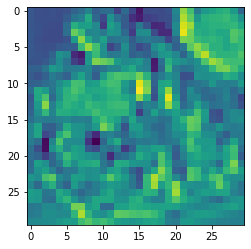

In [17]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

# Deep Convolutional Network

In [0]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3), # (N, 3, 32, 32) -> (N, 8, 30, 30)
        nn.Conv2d(8, 16, 3) # (N, 8, 30, 30) -> (N, 16, 28, 28)
    )

  def forward(self, x):
    x = self.model(x)
    return x  

In [19]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

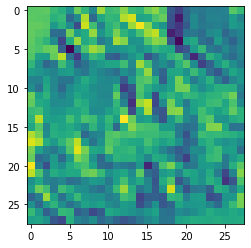

In [20]:
plt.imshow(out[0, 0, :,:].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5), # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.AvgPool2d(2, stride=2), #(N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5), # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.AvgPool2d(2, stride=2) #(N, 16, 10, 10) -> (N, 16, 5, 5)
    )

  def forward(self, x):
    x = self.model(x)
    return x  

In [22]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

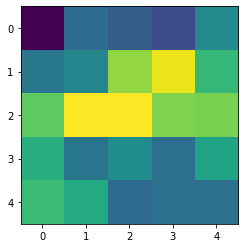

In [23]:
plt.imshow(out[0, 0, :,:].detach().numpy())

# LeNet

we are instantiating the tensors 

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),                                # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),                         #(N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),                               # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)                          #(N, 16, 10, 10) -> (N, 16, 5, 5)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),                               # (N, 400) -> (N, 120)   reshaping
        nn.Tanh(),
        nn.Linear(120, 84),                                # (N, 120) -> (N, 84)   
        nn.Tanh(),
        nn.Linear(84,10)                                   # (N, 84) -> (N, 10) 
    )

  def forward(self, x):
    print(x.shape)
    x = self.cnn_model(x) # calling cnn_model 
    print(x.shape)
    x = x.view(x.size(0),-1)  # then reshaping (the input needs to be flattened before passing it into the fully connected layer)
    print(x.shape)
    x = self.fc_model(x)    # then calling fc_model
    print(x.shape)
    return x  

In [25]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [26]:
print(out)

tensor([[ 0.0709, -0.1494, -0.0826, -0.0847,  0.0330, -0.0582,  0.0805,  0.0394,
          0.1319,  0.0056],
        [ 0.0692, -0.1315, -0.0675, -0.0805,  0.0411, -0.0484,  0.0614,  0.0241,
          0.1394,  0.0107],
        [ 0.0869, -0.1454, -0.0929, -0.0651,  0.0459, -0.0390,  0.0768,  0.0219,
          0.1133,  0.0257],
        [ 0.0755, -0.1376, -0.0778, -0.0734,  0.0316, -0.0515,  0.0662,  0.0440,
          0.1278,  0.0099]], grad_fn=<AddmmBackward>)


In [27]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([8, 8, 8, 8])


# Training LeNet

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),                                # (N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),                         #(N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),                               # (N, 6, 14, 14) -> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)                          #(N, 16, 10, 10) -> (N, 16, 5, 5)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),                               # (N, 400) -> (N, 120)   reshaping
        nn.Tanh(),
        nn.Linear(120, 84),                                # (N, 120) -> (N, 84)   
        nn.Tanh(),
        nn.Linear(84,10)                                   # (N, 84) -> (N, 10) 
    )

  def forward(self, x):
    x = self.cnn_model(x) # calling cnn_model 
    x = x.view(x.size(0),-1)  # then reshaping (the input needs to be flattened before passing it into the fully connected layer)
    x = self.fc_model(x)    # then calling fc_model
    return x

In [29]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
  total, correct = 0,0
  for data in dataloader:
    inputs, labels = data # ground truth
    outputs = net(inputs) # model prediction
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total  

In [0]:
net = LeNet()

defining loss function and optimizer

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.73, Train acc: 39.06
Epoch: 1/16, Test acc: 42.75, Train acc: 42.53
Epoch: 2/16, Test acc: 46.60, Train acc: 47.11
Epoch: 3/16, Test acc: 48.55, Train acc: 49.38
Epoch: 4/16, Test acc: 51.42, Train acc: 53.04
Epoch: 5/16, Test acc: 52.00, Train acc: 54.83
Epoch: 6/16, Test acc: 53.25, Train acc: 56.91
Epoch: 7/16, Test acc: 53.67, Train acc: 58.02
Epoch: 8/16, Test acc: 53.72, Train acc: 58.90
Epoch: 9/16, Test acc: 54.75, Train acc: 60.78
Epoch: 10/16, Test acc: 54.54, Train acc: 61.26
Epoch: 11/16, Test acc: 55.13, Train acc: 62.37
Epoch: 12/16, Test acc: 55.52, Train acc: 64.13
Epoch: 13/16, Test acc: 54.66, Train acc: 64.51
Epoch: 14/16, Test acc: 55.26, Train acc: 65.47
Epoch: 15/16, Test acc: 55.52, Train acc: 66.03


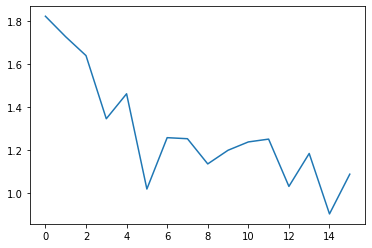

CPU times: user 8min 49s, sys: 5.55 s, total: 8min 55s
Wall time: 8min 56s


In [33]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):

    inputs, labels = data  

    opt.zero_grad()   # reset previous gradient

    outputs = net(inputs) # forward pass
    loss = loss_fn(outputs, labels)  # loss computation
    loss.backward()       # losss backward pass
    opt.step()            # updating parameters

    loss_arr.append(loss.item()) # storing loss

  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f'%(epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))  

plt.plot(loss_epoch_arr)
plt.show()


# Move to GPU

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
  total, correct = 0,0
  for data in dataloader:
    inputs, labels = data # ground truth
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs) # model prediction
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total  

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [37]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

  for i, data in enumerate(trainloader, 0):

    inputs, labels = data  
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()                  # reset previous gradient

    outputs = net(inputs)            # forward pass
    loss = loss_fn(outputs, labels)  # loss computation
    loss.backward()       # losss backward pass
    opt.step()            # updating parameters

  print('Epoch: %d/%d'%(epoch, max_epochs))  



Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 2min 9s, sys: 1.01 s, total: 2min 11s
Wall time: 2min 11s


In [38]:
print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f'%(epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))  


Epoch: 15/16, Test acc: 55.21, Train acc: 64.86


# Basic Visualisation

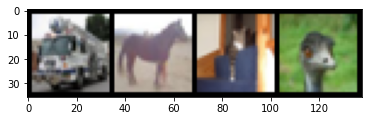

In [40]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [0]:
out = net(images)

In [43]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

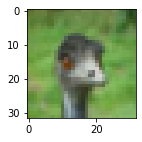

In [44]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

Below are the six channel of image 4 after first convolutional layer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


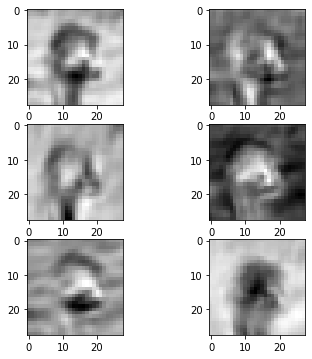

In [45]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
  ax1 = plt.subplot(3, 2, i+1)
  plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()  